## Kaggle 입문하기 - 데이터 분석 입문

### 학습 내용 
* 캐글에 대해 이해하기
* 캐글 데이터 셋을 이용하여 데이터 분석을 이해한다.

 * URL : https://www.kaggle.com/
 * Competitions 선택하면 다양한 대회 확인 가능.
 * 대회 주제 : Bike Sharing Demand
 * https://www.kaggle.com/c/bike-sharing-demand

In [32]:
from IPython.display import display, Image

### Data Fields
| 필드명 | 설명   |
|------|:------|
|   datetime  | hourly date + timestamp   |
|   season  | 계절 1 = spring, 2 = summer, 3 = fall, 4 = winter  |
|   holiday  |휴일인지  whether the day is considered a holiday |
|   workingday  | 일하는 날 whether the day is neither a weekend nor holiday |
|   weather  | 날씨 <br>1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br> |
|   temp  | temperature in Celsius (온도) |
|   atemp  | "feels like" temperature in Celsius (체감온도) |
|   humidity  | relative humidity (습도) |
|   windspeed  | wind speed (바람속도) |
|   casual  | number of non-registered user rentals initiated (비가입자 사용유저) |
|   registered  | number of registered user rentals initiated (가입자 사용유저) |
|   count  | number of total rentals (전체 렌탈 대수) |

In [50]:
import pandas as pd
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [51]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

### 1-1 데이터 준비하기
* train 은 학습을 위한 데이터 셋
* test 은 예측을 위한 데이터 셋
* ../data/bike : 상위폴더의 (data/bike 폴더 경로), 내 컴퓨터의 데이터 경로 지정.
* parse_dates = [컬럼명] : 해당 컬럼을 시간형 자료로 불러옴.

In [52]:
train = pd.read_csv("bike/train.csv", parse_dates=['datetime'])
test = pd.read_csv("bike/test.csv", parse_dates=['datetime'])

In [53]:
print(train.shape)   # : 행과 열 갯수 확인
print(test.shape)

(10886, 12)
(6493, 9)


In [54]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Text(0.5, 0.98, '피처의 값의 분포')

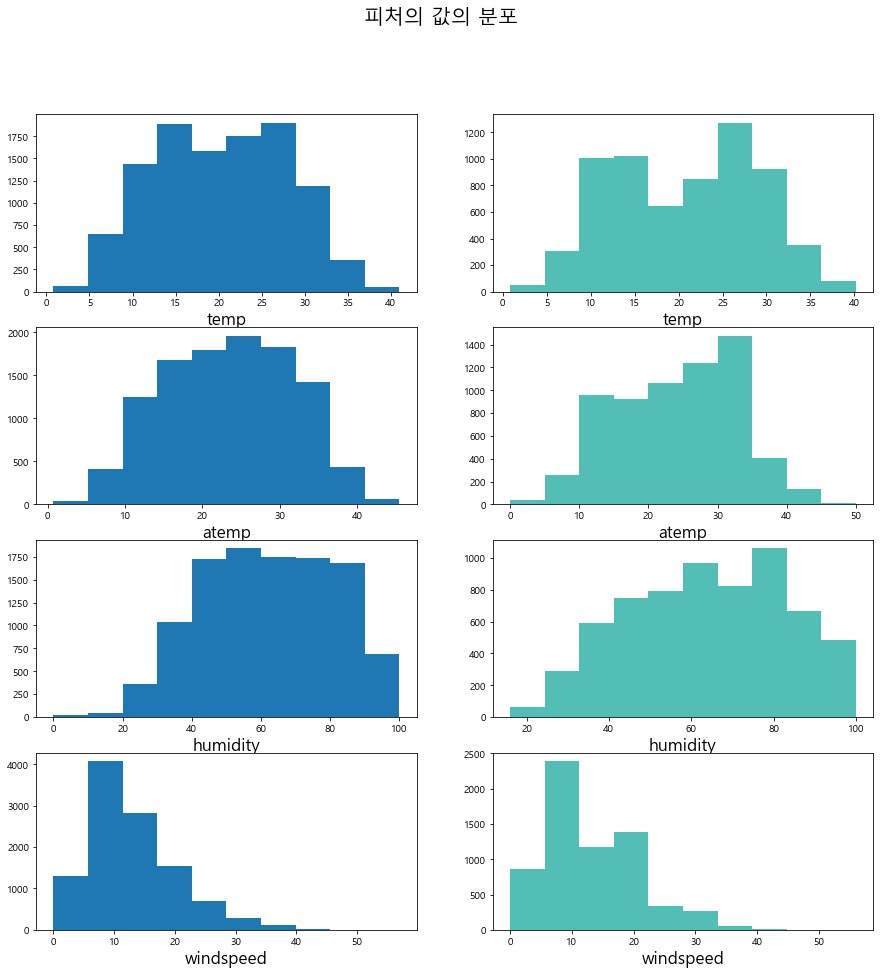

In [63]:
plt.figure(figsize=(15,15))

sel = ['temp', 'atemp', 'humidity', 'windspeed']

for idx, col in enumerate(sel):
    cnt = (idx*2) + 1
    plt.subplot(4,2,cnt) 
    plt.hist( train[col] )
    plt.xlabel(col, size=17)

    cnt = ( idx*2 ) + 2
    plt.subplot(4,2,cnt)
    plt.hist( test[col], color='#52BEB6' )
    plt.xlabel(col, size=17)

plt.suptitle("피처의 값의 분포", size=20)

### 결측치 처리

In [65]:
train.windspeed.describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [74]:
dat = train[ train['windspeed'] == 0]
dat.shape

(1313, 12)

In [73]:
dat.index

Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,     9,
               64,
            ...
            10816, 10817, 10818, 10819, 10823, 10826, 10829, 10846, 10860,
            10862],
           dtype='int64', length=1313)

In [98]:
test[ test['windspeed'] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0
12,2011-01-20 12:00:00,1,0,1,2,12.30,16.665,42,0.0
60,2011-01-22 13:00:00,1,0,0,1,3.28,8.335,35,0.0
62,2011-01-22 15:00:00,1,0,0,1,4.92,7.575,28,0.0
...,...,...,...,...,...,...,...,...,...
6433,2012-12-29 12:00:00,1,0,0,3,8.20,12.120,100,0.0
6434,2012-12-29 13:00:00,1,0,0,3,8.20,12.120,100,0.0
6436,2012-12-29 15:00:00,1,0,0,2,9.84,12.120,87,0.0
6444,2012-12-29 23:00:00,1,0,0,2,10.66,12.120,60,0.0


In [99]:
train.loc[ train['windspeed'] == 0, 'windspeed'] = 1
test.loc[ test['windspeed'] == 0, 'windspeed'] = 1

In [100]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,1.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,1.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,1.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,1.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,1.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### qcut()를 이용하여 동일 개수로 나누어보기

In [118]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'qcut_humidity'],
      dtype='object')

In [119]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [121]:
print(train.shape, test.shape)
all_bike = pd.concat([train,test], join='inner')
all_bike

(10886, 13) (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,1.0000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,1.0000
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,1.0000
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,1.0000
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,1.0000
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [122]:
all_bike['qcut_humidity'] = pd.qcut(all_bike['humidity'], 5, labels=False)
all_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,qcut_humidity
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,1.0000,3
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,1.0000,3
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,1.0000,3
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,1.0000,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,1.0000,3
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,1


In [126]:
train_df = all_bike.iloc[0:10886, :]
test_df = all_bike.iloc[10886: , :]
train_df.shape, test_df.shape

((10886, 10), (6493, 10))

In [127]:
train_df = pd.concat([train_df, train['count']],axis=1 )
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,qcut_humidity,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,1.0000,3,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,1.0000,3,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,1.0000,3,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,1.0000,3,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,1.0000,3,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,1,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,2,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,2,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,2,129


### 입력데이터 선택 

In [128]:
f_names = ['temp', 'atemp', 'qcut_humidity']
X_train = train_df[f_names]    # 학습용 데이터의 변수 선택 
X_test = test_df[f_names]      # 테스트 데이터의 변수 선택 

### 출력 데이터 선택

In [129]:
label_name = 'count'        # 렌탈 대수 (종속변수)
y_train = train_df[label_name] # 렌탈 대수 변수 값 선택

### 1-2 모델 만들기 및 제출

### 모델 만들기 및 예측 순서
 * 모델을 생성한다. model = 모델명()
 * 모델을 학습한다.  model.fit( 입력값, 출력값 )
 * 모델을 이용하여 예측 model.predict(입력값)

In [130]:
# 회귀 모형 만들기
from sklearn.ensemble import RandomForestRegressor

In [131]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)   # 예측(새로운 데이터로)
pred

array([129.81271351, 102.8417284 , 102.8417284 , ..., 128.27056183,
       102.8417284 ,  66.62787424])

### 학습된 모델로 예측 후, 제출하기

In [132]:
sub = pd.read_csv("bike/sampleSubmission.csv")
sub.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [133]:
pred = model.predict(X_test)   # 예측
sub['count'] = pred
sub[sub['count']<0]

,datetime,count


### 처음 만는 제출용 csv 파일
 * index=False : csv 파일 행번호 없애기

In [134]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("fourth_rf_submission.csv", index=False)

In [108]:
### 01 RandomForeset : [temp, atemp] : 1.40993
### 02 RandomForeset : [temp, atemp, windspeed] : 1.41635     down
### 03 RandomForeset : [temp, atemp, humidity] : 1.36726      up
### 04 RandomForeset : [temp, atemp, qcut_humidity] : 1.36471 up